In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Análisis de una señal armónica

Ua señal armónica es aquella que tiene una única componente de Fourier. Este tipo de señales son teóricas, ya que se requiere que la duración sea infinita, pero se puede aproximar como se ve a continuación

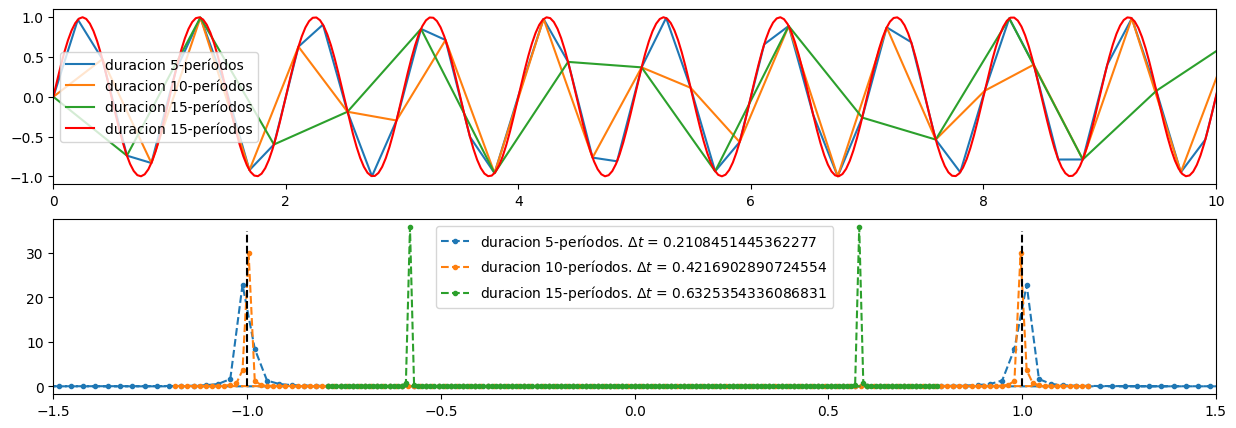

In [2]:
# Vamos a utilizar una cantidad fija de puntos, analizando mayor duración
n = 150 # numero de puntos
f = 1 # frecuencia
fig, axs = plt.subplots(2,1,figsize=(15,5))
for i in range(5,20,5):
    t = np.linspace(0, i * 2 * np.pi,n)    
    x = np.sin(2*np.pi*f*t)
    axs[0].plot(t,x,label=f'duracion {i}-períodos')
    dft = np.fft.fft(x, norm='ortho')
    freqs = np.fft.fftfreq(n,t[1]-t[0])
    axs[1].plot(freqs, np.abs(dft)**2, '--o', ms  =3, label = f'duracion {i}-períodos. $\Delta t$ = {t[1]-t[0]}')
axs[0].set_xlim(0,10)
n = 3000 # numero de puntos
f = 1 # frecuencia
t = np.linspace(0, 15 * 2 * np.pi,n)    
x = np.sin(2*np.pi*f*t)
axs[0].plot(t,x,'r-',label=f'duracion {15}-períodos')
axs[0].legend()
axs[1].vlines([-1,1],0,35, colors='k',linestyles='dashed')
axs[1].set_xlim(-1.5,1.5)
axs[1].legend()
plt.show()

* La función seno se puede escribir como $sin(x) = \frac{exp(ix)-exp(-ix)}{2i}$, por lo que en el caso anterior se encuentran las frecuencias f = {1,-1}. 
* Es importante notar el factor $2\pi$ que acompaña a la frecuencia. 
* La frecuencia máxima posible estará determinada por $\Delta t$ y el número total de puntos
* No siempre se puede encontrar la frecuencia exacta de la serie temporal, esta debe coincidir con la discretización temporal y de frecuencia. La razón de la falta de posibilidad de representar algunas frecuencias está dada por la denominada frecuencia de **Nyquist**, el caso de 15 períodos con pocos puntos, donde la frecuencia que se observa es ficticia y está dada sólo por un efecto de discretización.

## Estimación de la estacionalidad de una ST

El siguiente ejemplo es de los valores del acelerómetro de un teléfono móvil al caminar. 

Es importante recordar que por los factores $2 \pi$ de la definición del algoritmo FFT, el período de oscilación se obtiene como
$$
\tau = \frac{1}{f}
$$


In [79]:
import csv

with open('../../Data/acelerometro/oscilador.csv', 'r') as fp:
    reader = csv.reader(fp, delimiter=';')
    col_names = next(reader)
    data = []
    for row in reader:
        data.append([float(r) for r in row])
data = np.array(data)
time = data[2000:10000,0]
osc_x = data[2000:10000,1]

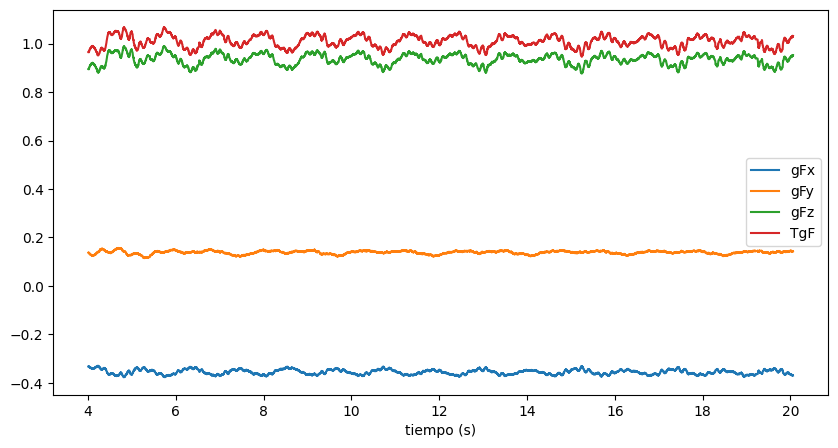

In [80]:
plt.figure(figsize=(10,5))
plt.xlabel('tiempo (s)')
for i in range(len(col_names)-1):
    plt.plot(data[2000:10000,0],data[2000:10000,i+1], label=col_names[i+1])
plt.legend()

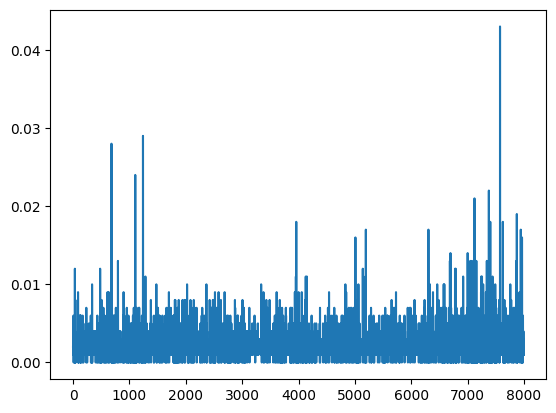

In [90]:
spectral_density = np.abs(np.fft.fft(osc_x, axis=0))**2
freqs = np.fft.fftfreq(time.shape[0], time[1]-time[0])
plt.plot(np.round(time[1:]-time[:-1],3))

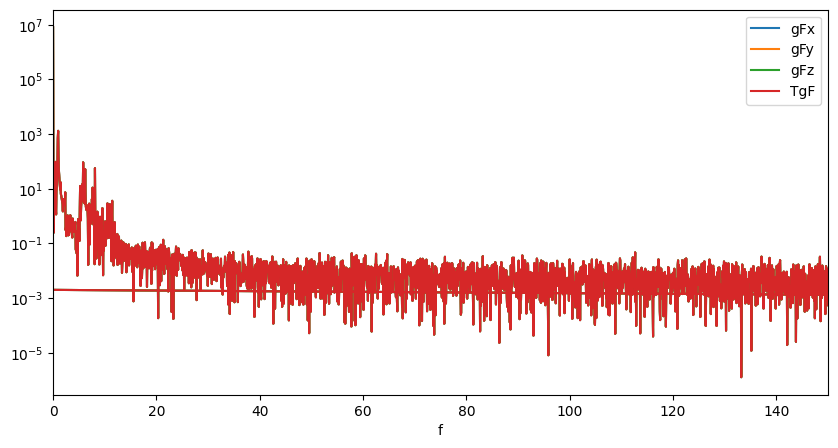

In [84]:
plt.figure(figsize=(10,5))
plt.xlabel('f')
for i in range(len(col_names)-1):
    plt.semilogy(freqs,spectral_density, label=col_names[i+1])
plt.xlim(0,150)
plt.legend()

In [76]:
from scipy.signal import find_peaks

#suavizamos con un filtro gaussiano la señal

def gauss(x, m, s):
    return np.exp(-(x-m)**2/2/s**2)/np.sqrt(2*np.pi)/s

plantilla = gauss(np.arange(13),6,3)
soft = np.hstack([np.zeros(6),np.convolve(spectral_density[:,0], plantilla, mode='valid'),np.zeros(6)])

Períodos de oscilación [ 2.27902195e+00  5.46965268e-01  3.33515407e-01  1.77586126e-01
  1.47033674e-01  1.19948524e-01  9.56232986e-02  7.95007657e-02
  6.94118360e-02  6.24389575e-02  5.38351642e-02  5.12139764e-02
  4.63529888e-02  4.32725687e-02  3.90689477e-02  3.40152530e-02
  3.12909192e-02  2.90938972e-02  2.71312137e-02  2.55591247e-02
  2.40741755e-02  2.21264267e-02  1.91783053e-02  1.81836858e-02
  1.74637697e-02  1.51766168e-02  1.44394210e-02  1.40825249e-02
  1.38964753e-02  1.34060115e-02  1.29982240e-02  1.15005313e-02
  1.09832383e-02  1.07080123e-02  1.03278940e-02  1.01214890e-02
  9.91597657e-03  9.73941004e-03  9.57572248e-03  8.23742873e-03
  5.95822732e-03  5.12331648e-03  4.88013265e-03  4.44542643e-03
  4.35898365e-03  4.25985411e-03  4.14618911e-03  3.99477993e-03
  3.95778052e-03  3.85947832e-03  3.84104823e-03  3.69671038e-03
  3.59467184e-03  3.56933743e-03  3.55080023e-03  3.53063044e-03
  3.48740926e-03  3.47147289e-03  3.39729980e-03  3.38384848e-03
  

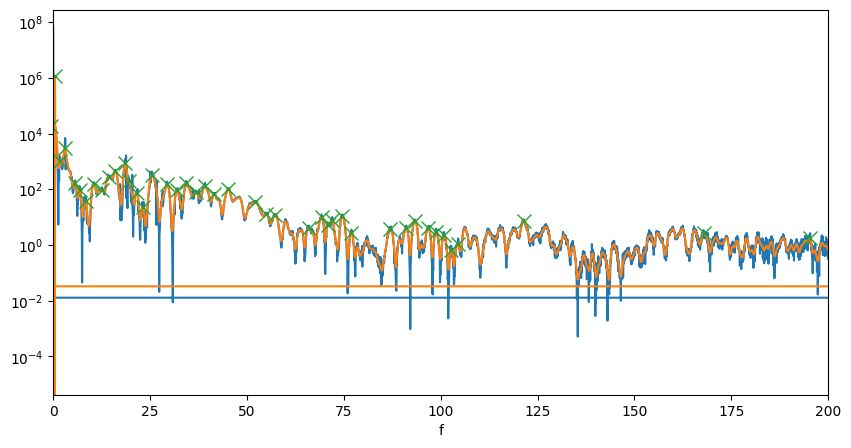

In [77]:
peaks = find_peaks(soft,threshold=0.01, distance=10)[0]
print(f'Períodos de oscilación {1/freqs[peaks]}')
plt.figure(figsize=(10,5))
plt.xlabel('f')
plt.semilogy(freqs,spectral_density[:,0])
plt.semilogy(freqs,soft)
plt.semilogy(freqs[peaks],soft[peaks],'x', ms=10)
plt.xlim(0,200)
plt.show()

In [67]:
1/freqs[peaks]

array([ 0.62062992,  0.19948819,  0.12142759,  0.09630464,  0.07161114,
        0.05319685,  0.04398165,  0.03774101,  0.03364861,  0.03138016,
        0.02821045,  0.0262238 ,  0.02428552,  0.021078  ,  0.01932758,
        0.01784559,  0.01692627,  0.01614355,  0.01501524,  0.01365689,
        0.01281117,  0.01209019,  0.01142264,  0.01088824,  0.01042102,
        0.01006427,  0.00969734,  0.00926313,  0.00888024,  0.00856698,
        0.00829966,  0.00782307,  0.00758922,  0.00737869,  0.00697337,
        0.00679522,  0.00662594,  0.00645742,  0.00631149,  0.00615162,
        0.0060061 ,  0.00587347,  0.00574067,  0.0054923 ,  0.00537084,
        0.00525463,  0.00514334,  0.00504122,  0.00486133,  0.00477   ,
        0.00467811,  0.00459726,  0.00451915,  0.00444365,  0.00437406,
        0.00430329,  0.00423157,  0.0041591 ,  0.00357597,  0.00338731,
        0.00322126, -0.00322126, -0.00338731, -0.00357597, -0.0041591 ,
       -0.00423157, -0.00430329, -0.00437406, -0.00444365, -0.00

In [48]:
soft[peaks]

array([6.42782631e+06, 2.13754813e+05, 5.98981666e+05, 9.07427957e+03,
       6.10266745e+04, 2.69873498e+04, 1.41207793e+04, 5.74553675e+03,
       2.36702073e+03, 1.15429720e+04, 8.92066766e+02, 2.47028579e+03,
       6.48821504e+03, 9.67773841e+02, 1.13179303e+03, 8.99290470e+02,
       1.48496966e+03, 2.97741254e+02, 4.40295796e+02, 2.38203710e+02,
       9.20989640e+01, 7.50149768e+01, 7.15980950e+01, 1.01386565e+02,
       7.65326871e+01, 1.02166384e+02, 6.18639913e+01, 8.84533154e+01,
       6.36511278e+01, 1.07147829e+02, 1.63613880e+01, 2.59058194e+01,
       2.03565442e+01, 4.05134143e+01, 3.44064543e+01, 3.09301685e+01,
       3.25786615e+01, 2.27512404e+01, 1.44821615e+01, 5.81958328e+01,
       5.14387153e+01, 4.08144570e+01, 2.25182075e+01, 1.90619941e+01,
       2.59506082e+01, 9.62043156e+00, 2.41467614e+01, 1.65373280e+01,
       1.05470865e+01, 7.29755482e+00, 1.61105476e+01, 1.83165993e+01,
       1.40714818e+01, 1.85488445e+01, 7.56799768e+00, 1.39907328e+01,
      

(0.0, 10.0)

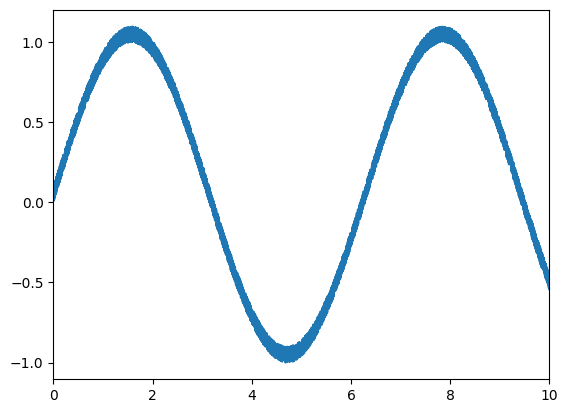

In [38]:
t = np.arange(100000)*0.001
data = np.sin(t)+np.random.uniform(0,0.1, size= 100000)
plt.plot(t,data)
plt.xlim(0,10)

[ 0.    0.01  0.02 ... -0.03 -0.02 -0.01]


(0.0, 10.0)

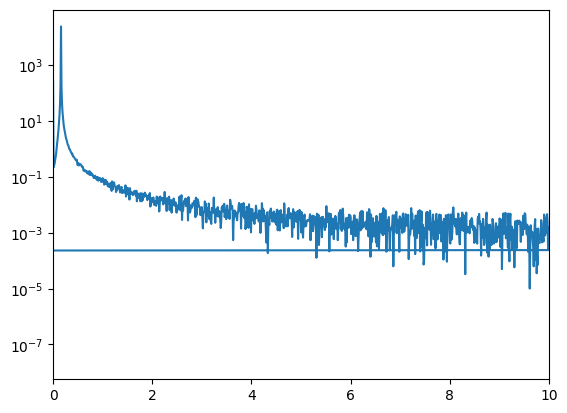

In [20]:
freqs = np.fft.fftfreq(100000,0.001)
print(freqs)
spectral_density = np.abs(np.fft.fft(data, norm='ortho'))**2
plt.semilogy(freqs, spectral_density)
plt.xlim(0,10)


In [21]:
peaks = find_peaks(spectral_density,threshold=0.01, distance=10)[0]
1/freqs[peaks]

array([ 6.25      ,  2.56410256,  1.96078431,  1.36986301,  1.14942529,
        1.        ,  0.84033613,  0.7518797 ,  0.68493151,  0.5952381 ,
        0.55555556,  0.44444444,  0.36630037,  0.30864198, -0.30864198,
       -0.36630037, -0.44444444, -0.55555556, -0.5952381 , -0.68493151,
       -0.7518797 , -0.84033613, -1.        , -1.14942529, -1.36986301,
       -1.96078431, -2.56410256, -6.25      ])